<H1>Taller 1 EDA PREGUNTA SMART</h1>

<h3>Problema</h3>En un sistema de medición que abarca hasta 100,000 equipos — incluyendo medidores, sensores y equipos de comunicación — distribuidos en varias ciudades del país, los mecanismos para identificar equipos en falla tardan más de 10 días y se basan en factores externos a la red, lo que resulta en un desgaste innecesario en áreas que no requieren mantenimiento..
<h3>Pregunta SMART</h3><b>¿Cuáles equipos específicos del sistema de medición inteligente han presentado fallas individuales o del sistema en los últimos 3 meses y requieren mantenimiento correctivo?</b>
<h3>Cómo la ciencia de datos puede ofrecer una solución</h3>La ciencia de datos puede ofrecer una solución efectiva. Dado que disponemos de información sobre el funcionamiento de los equipos, podemos emplear análisis predictivo para identificar las condiciones en las que un medidor comunica correctamente o presenta problemas. Además, el uso de algoritmos de detección de anomalías puede ayudar a identificar datos inusuales. Así, la ciencia de datos permite optimizar los recursos y mejorar el mantenimiento preventivo y correctivo, reduciendo así los costos asociados.

<H1>Taller 2 EDA ANÁLISIS UNIVARIADO</H1>

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#se carga el dataset
#Se agrega la opción dtype='unicode' porque se generó el error : 'DtypeWarning: Columns (0,1,5,8) have mixed types. Specify dtype option on import or set low_memory=False.'

df = pd.read_csv('exportBDeda.csv',dtype='unicode')

In [4]:
#Se revisa la cabecera y los primeros datos, se observa valores nulos en algunas columnas y hay una columna channel que contiene el valor de la variable que se está leyendo.
#La columna status tiene un valor Unknown que se debe tratar como un NaN
df.head()

,METER_NO,MEASURING_POINT,STATUS,DATE_TIME,CHANNEL,DATA_VALUE,UNIT_MEASUREMENT,CODE_OBIS,TRANSFORMER,REGION
0,2011999027,NaN,Unknown,2022/11/09 13:00:00,L3 Last average voltage,7,V,1.0.72.25.0.255,NaN,NaN
1,2011999027,NaN,Unknown,2022/11/09 13:45:00,DemandForReactiveExportPower,0,kW,1.0.4.4.0.255,NaN,NaN
2,2011999027,NaN,Unknown,2022/11/09 12:45:00,Interval-LP Export kWh,0,kWh,1.0.2.29.0.255,NaN,NaN
3,2011999027,NaN,Unknown,2022/07/29 07:15:00,L1 Last average voltage,131.9,V,1.0.32.25.0.255,NaN,NaN
4,2011999027,NaN,Unknown,2022/07/29 08:30:00,Interval-LP Import kVarh,0,kVarh,1.0.3.29.0.255,NaN,NaN


In [5]:
#al observar los últimos datos se observan valores válidos para variables como transformer,region,measuring_point y status.
df.tail()

,METER_NO,MEASURING_POINT,STATUS,DATE_TIME,CHANNEL,DATA_VALUE,UNIT_MEASUREMENT,CODE_OBIS,TRANSFORMER,REGION
1205695,2203700612,2203700612,InstallWithActive,2023/06/21 20:00:00,Signal strength,26.0,dBm,0.0.96.12.5.255,6576,Chiquinquira
1205696,2203700612,2203700612,InstallWithActive,2023/06/21 16:00:00,L3 Last average voltage,121.4,V,1.0.72.25.0.255,6576,Chiquinquira
1205697,2203700612,2203700612,InstallWithActive,2023/06/20 20:00:00,L3 Last average voltage,121.2,V,1.0.72.25.0.255,6576,Chiquinquira
1205698,2203700612,2203700612,InstallWithActive,2023/06/23 18:00:00,DemandForReactiveImportPower,0.162,kW,1.0.3.4.0.255,6576,Chiquinquira
1205699,2203700612,2203700612,InstallWithActive,2023/06/23 13:00:00,L1 Last average current,0.62,A,1.0.31.25.0.255,6576,Chiquinquira


In [6]:
df.shape

(1205700, 10)

In [7]:
#Validamos valores duplicados
df.duplicated().sum()

np.int64(1546)

In [8]:
#Eliminamos duplicados
df.drop_duplicates(inplace=True)

In [9]:
#Validamos nuevamente valores duplicados
df.duplicated().sum()

np.int64(0)

In [10]:
#Los valores nulos en measuring point, region y transformer nos indica que hay información sobre la ubicación de los medidores que no está registrada
#Los valores nulos en Unit Measurement se puede presumir que son variables sin unidad.
df.isnull().sum()

METER_NO                0
MEASURING_POINT     25698
STATUS                  0
DATE_TIME               0
CHANNEL                 0
DATA_VALUE              0
UNIT_MEASUREMENT    64677
CODE_OBIS               0
TRANSFORMER         75955
REGION              25698
dtype: int64

In [11]:
#Al revisar los valores de los canales, el canal primario que es Import kWh está en cuarta posición, se esperaba que esté de primero debido a que todos los medidores sin exepción deben tener este canal
#Por lo tanto, se concluye que hay pérdida de datos por ausencia de canales.  
df.CHANNEL.value_counts()

CHANNEL
Interval-LP Import kVarh        62466
Interval-LP Export kWh          62460
Interval-LP Export kVarh        62459
Interval-LP Import kWh          62452
Import kWh                      62136
Export kWh                      62134
Import kVarh                    61931
Export kVarh                    61923
Billing Status 2                58511
L1 Last average voltage         58007
L1 Last average current         57982
L2 Last average current         57981
L3 Last average current         57974
L3 Last average voltage         57973
L2 Last average voltage         57968
DemandForReactiveImportPower    57735
DemandForActiveExportPower      57734
DemandForActiveImportPower      57734
DemandForReactiveExportPower    57733
Signal strength                 56884
Billing Status                   5645
Interval-LP Q2 kvarh              541
Interval-LP Q4 kvarh              541
Interval-LP Q3 kvarh              541
Interval-LP Q1 kvarh              541
Voltage_L3                        521
Curr

In [12]:
#Pivotar el DataFrame 
#Se hace el pivot para poder trabajar con información estadistica sobre cualquier variable, además que si falta un canal se puede estimar en base a los otros 
df_pivot = df.pivot_table(index=['METER_NO','DATE_TIME'],
                          columns='CHANNEL',
                          values='DATA_VALUE',
                          aggfunc='sum').reset_index()

# Eliminar la jerarquía de las columnas ???
df_pivot.columns.name = None


In [13]:
#Se eliminan las variables que tienen muy poca frecuencia

df_pivot.drop(columns=df.CHANNEL.value_counts()[df.CHANNEL.value_counts() < 10000].index,inplace=True)

In [14]:
df_pivot.shape

(63389, 22)

In [15]:
df_pivot.head()

,METER_NO,DATE_TIME,Billing Status 2,DemandForActiveExportPower,DemandForActiveImportPower,DemandForReactiveExportPower,DemandForReactiveImportPower,Export kVarh,Export kWh,Import kVarh,...,Interval-LP Export kWh,Interval-LP Import kVarh,Interval-LP Import kWh,L1 Last average current,L1 Last average voltage,L2 Last average current,L2 Last average voltage,L3 Last average current,L3 Last average voltage,Signal strength
0,2011999027,2022/07/23 08:00:00,0,0,0,0,0,1.405,2.296,1.457,...,0,0,0,0,131.9,0,0,0,0,NaN
1,2011999027,2022/07/23 08:15:00,0,0,0,0,0,1.405,2.296,1.457,...,0,0,0,0,132.5,0,0,0,0,NaN
2,2011999027,2022/07/23 08:30:00,0,0,0,0,0,1.405,2.296,1.457,...,0,0,0,0,132.7,0,0,0,0,NaN
3,2011999027,2022/07/23 08:45:00,0,0,0,0,0,1.405,2.296,1.457,...,0,0,0,0,131.8,0,0,0,0,NaN
4,2011999027,2022/07/23 09:00:00,0,0,0,0,0,1.405,2.296,1.457,...,0,0,0,0,131.5,0,0,0,0,NaN


In [16]:
#Se analiza la variable DATE_TIME
df_pivot.dtypes

METER_NO                        object
DATE_TIME                       object
Billing Status 2                object
DemandForActiveExportPower      object
DemandForActiveImportPower      object
DemandForReactiveExportPower    object
DemandForReactiveImportPower    object
Export kVarh                    object
Export kWh                      object
Import kVarh                    object
Import kWh                      object
Interval-LP Export kVarh        object
Interval-LP Export kWh          object
Interval-LP Import kVarh        object
Interval-LP Import kWh          object
L1 Last average current         object
L1 Last average voltage         object
L2 Last average current         object
L2 Last average voltage         object
L3 Last average current         object
L3 Last average voltage         object
Signal strength                 object
dtype: object

In [22]:
#Ajustamos la columna de fecha a datetime
df_pivot['DATE_TIME'] = pd.to_datetime(df_pivot['DATE_TIME'])


In [23]:
df_pivot.dtypes

METER_NO                                object
DATE_TIME                       datetime64[ns]
Billing Status 2                        object
DemandForActiveExportPower              object
DemandForActiveImportPower              object
DemandForReactiveExportPower            object
DemandForReactiveImportPower            object
Export kVarh                            object
Export kWh                              object
Import kVarh                            object
Import kWh                              object
Interval-LP Export kVarh                object
Interval-LP Export kWh                  object
Interval-LP Import kVarh                object
Interval-LP Import kWh                  object
L1 Last average current                 object
L1 Last average voltage                 object
L2 Last average current                 object
L2 Last average voltage                 object
L3 Last average current                 object
L3 Last average voltage                 object
Signal streng

<Axes: >

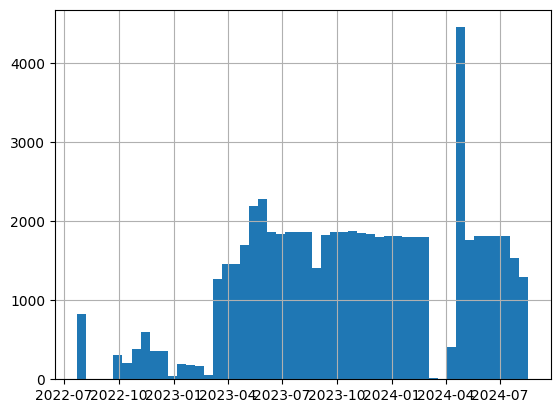

In [24]:
#Analizamos la columna datetime
df_pivot['DATE_TIME'].hist(bins=50)

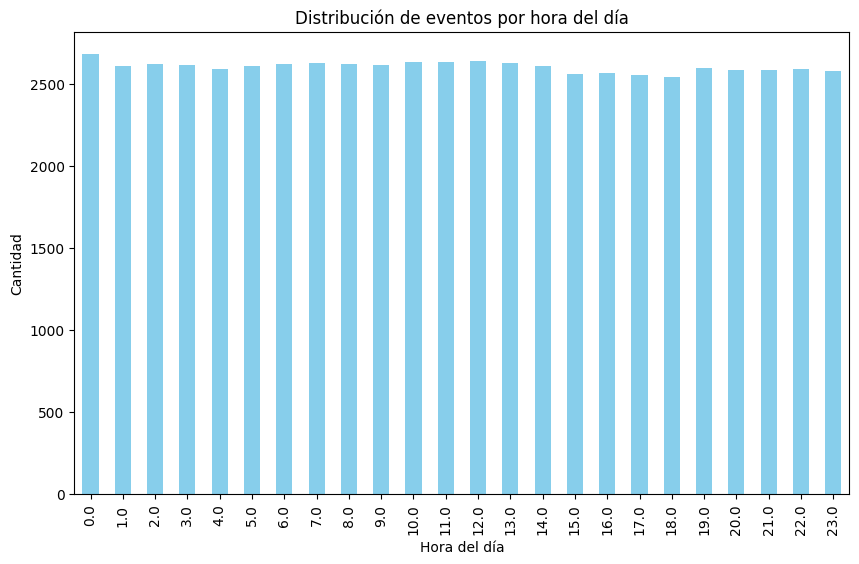

In [33]:
#Al analizar el histograma se observa un hueco de información importante y que persiste data muy vieja
df['hour'] = df_pivot['DATE_TIME'].dt.hour

hour_counts = df['hour'].value_counts().sort_index() 
plt.figure(figsize=(10, 6))
hour_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad')
plt.title('Distribución de eventos por hora del día')
plt.show()

In [ ]:
#CONLUSIONES

#COLUMNA DATETIME
#Al hacer el ánalisis univariable de la columna DATE_TIME se evidencia que hora a hora se pierde información de los medidores, el sistema transaccional en sí debería recuperar la información
#sin embargo, se considera conveniente trabajar en estimaciones sobre los valores nulos para tener un dataset más completo para obtener anomalías más díficiles de detectar basadas en la medida y la integridad de los datos

